In [14]:
import json

with open('hackupc2023_restbai__dataset_sample.json', encoding='utf-8') as file:
    # Load the JSON data
    data = json.load(file)

Each property is represented by a number, and is associated to a dictionary that includes all the data in each house.

- `summary`: Title describing the property (written in Spanish).

- `city`: Municipality where the property is located.
- `neighborhood`: Neighborhood where the property is located.
- `region`: Region / Province where the property is located.
- `price`: Sold price (in Euros) of the property once was listed.
- `square_meters`: Living area of the property.
- `bedrooms`: Number of bedrooms of the property.
- `bathrooms`: Number of bathrooms on the property.
- `images`: Array of Internet-accessible URLs pointing to the property images.
  - Format is always like `https://restb-hackathon.s3.amazonaws.com/real_estate_dataset/images/{PROPERTY_ID}__{IMAGE_IDX}.jpg` where `PROPERTY_ID` is the same as the `key` of the dictionary and the `IMAGE_IDX` is going from `0` to `n - 1`.
- `num_images`: Number of images available of the property.
- `image_data`: Dictionary with the image insights that Restb.ai solutions could extract:
  - `image_data.r1r6`: Dictionary with the 4 different values of the R1R6 score (see PDF attached into the ZIP for more context).
    - `image_data.r1r6.property`: R1R6 score of the whole property.
    - `image_data.r1r6.kitchen`: R1R6 score of the kitchen sub-group of the property.
    - `image_data.r1r6.bathroom`: R1R6 score of the bathroom sub-group of the property.
    - `image_data.r1r6.interior`: R1R6 score of the interior sub-group of the property.
  - `image_data.style`: Dictionary with the Exterior Style of the property.
    - `image_data.style.label`: Label of the most confident prediction of the style of the property.
    - `image_data.style.confidence`: Float value (0 - 1) related with the confidence of the style of the property.
  - `image_data.features_by_room_type`: Dictionary with the Features found in the property split by Room types.
    - Each `key` of this dictionary is the Room Type label (i. e. `kitchen`).
    - Each value is a dictionary with the information found inside:
      - `image_data.features_by_room_type.RT.unique_features`: List of dictionaries with all the unique features from a list of +100 available options.
        - `image_data.features_by_room_type.RT.unique_features.label`: Label of the detection found in the `RT` room type (i. e. `refrigerator`).
        - `image_data.features_by_room_type.RT.unique_features.details`: Array of detailed labels related to the main detection (i. e. `stainless_steel`).
      - `image_data.features_by_room_type.RT.best_photo_idx`: Integer pointing to the index of the `images` array referring to the best photo of that room type of the property.
- `property_type`: Property type of the property.
  - Within the following 4 options: `single_family`, `condo_apartment`, `multi_family`, and `townhome`.
  
Image data is a dictionary as well. Therefore, we will have to treat it.  

Per cada propietat tenim l'score de les diverses habitacions i de la casa en general (pot haver-hi valors a nuls).

Tenim informació de l'estil i la confiança amb la qual es troba.


  

In [60]:
def extract_image_data_el(item, file):
    prop = file[item]
    image_data = prop["image_data"]
    # r1r6
    for el in ["property", "kitchen", "bathroom", "interior"]:
        prop["image_data.r1f6." + el] = image_data["r1r6"][el]

    # style
    for el in ["label", "confidence"]:
        prop["image_data.style" + el] = image_data["style"][el]
    
    
def extract_image_data(file):
    for item in file:
        extract_image_data_el(item, file)

In [61]:
extract_image_data(data)

In [62]:
import pandas as pd

df = pd.DataFrame.from_dict(data, orient="index")


In [65]:
df = df.drop("image_data", axis=1)

In [113]:
features_detected = ['baseboard_radiator', 'central_ac', 'dishwasher', 'double_oven', 'microwave', 'oven', 'radiator', 'range_hood', 'range_oven', 'separate_washer__dryer', 'stacked_washer__dryer', 'stovetop', 'refrigerator', 'tv', 'wall_mounted_ac', 'washer__dryer', 'water_heater', 'backsplash', 'bath', 'combined_bath_shower', 'double_sink', 'mirror', 'shower', 'sink', 'toilet', 'vanity', 'awning', 'balcony', 'basketball_court', 'bocce_ball', 'ceiling_fan', 'deck', 'dock', 'dog_park', 'dog_washing_station', 'fence', 'fire_pit', 'fireplace', 'fountain', 'french_doors', 'garden', 'gate', 'gazebo', 'hot_tub', 'lanai', 'lawn', 'mail_area', 'outdoor_bar', 'outdoor_kitchen', 'outdoor_living_space', 'outdoor_structure', 'package_area', 'patio', 'pergola', 'playground', 'pool', 'porch', 'putting_green', 'shuffleboard', 'soccer_field', 'solar_panels', 'storm_shelter', 'sunroom', 'tennis_court', 'trampoline', 'volleyball_court', 'aggregate_floor', 'brick_floor', 'carpet', 'concrete_floor', 'hardwood_floor', 'parquet_floor', 'tile_floor', 'beamed_ceiling', 'brick_ceiling', 'brick_wall', 'built_in_shelves', 'ceiling_fan', 'coffered_ceiling', 'concrete_ceiling', 'concrete_wall', 'crown_molding', 'drop_ceiling', 'elevator', 'fireplace', 'floor_ceiling_windows', 'french_doors', 'high_ceiling', 'log_wall', 'low_ceiling', 'natural_light', 'notable_chandelier', 'pool', 'skylight', 'stone_wall', 'textured_ceiling', 'tile_wall', 'track_lighting', 'tray_ceiling', 'vaulted_ceiling', 'wood_ceiling', 'wood_wall', 'backsplash', 'brown_cabinets', 'dark_brown_cabinets', 'light_brown_cabinets', 'white_cabinets', 'stone_countertops', 'countertops', 'kitchen_bar', 'kitchen_island', 'pendant_lighting','attached_carport', 'attached_garage', 'built_in_garage', 'detached_carport', 'detached_garage','beach_view', 'mountain_view', 'water_view']

In [68]:
df.head()

,summary,city,neighborhood,region,price,square_meters,bedrooms,bathrooms,images,num_images,...,kitchen_island,pendant_lighting,attached_carport,attached_garage,built_in_garage,detached_carport,detached_garage,beach_view,mountain_view,water_view
303464,Dúplex en Les Arenes-Can Montllor-La Grípia,Les Arenes-Can Montllor-La Grípia,Distrito La Grípia-Sant Llorenç. Terrassa,valles_occidental_nord,155000,60,2,2,[https://restb-hackathon.s3.amazonaws.com/real...,1,...,0,0,0,0,0,0,0,0,0,0
323570,Casa adosada en Burgos,Universidad-Las Huelgas,Burgos Capital,alfoz_de_burgos,281000,272,4,2,[https://restb-hackathon.s3.amazonaws.com/real...,3,...,0,0,0,0,0,0,0,0,0,0
232546,Piso en El Playazo,El Playazo,Vera,levante_almeriense,134900,87,2,2,[https://restb-hackathon.s3.amazonaws.com/real...,1,...,0,0,0,0,0,0,0,0,0,0
261286,Piso en Mieres,Baíña-San Pedro-Siana,Mieres,asturias,35000,56,2,1,[https://restb-hackathon.s3.amazonaws.com/real...,22,...,0,0,0,0,0,0,0,0,0,0
800153,"Piso en Carrer del Bisbe Morgades, cerca de Ca...",Centre Històric,Vic,osona,395000,134,4,2,[https://restb-hackathon.s3.amazonaws.com/real...,1,...,0,0,0,0,0,0,0,0,0,0


In [121]:
for col in features_detected:
    df[col] = 0

for id_house, row in df.iterrows():
    j = data[id_house]['image_data']["features_by_room_type"]
    for k in j:
        for i in range (len(j[k]["unique_features"])):
            feature = j[k]["unique_features"][i]['label'];
            df.at[id_house, feature] = 1;

In [122]:
df["washer__dryer"].value_counts()

0    90
1    10
Name: washer__dryer, dtype: int64

City
Neighborhood
Region

Price: Distribuir com una normal (apliquem logaritme)

square_meters
bedrooms
bathrooms



In [123]:
df.to_csv("hackupc.csv")

<Axes: xlabel='price', ylabel='Count'>

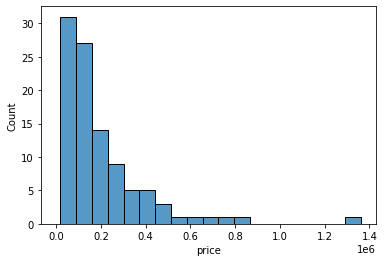

In [129]:
import seaborn as sns
import numpy as np

sns.histplot(df, x="price")

df["logprice"] = np.log(df["price"])

<Axes: xlabel='logprice', ylabel='Count'>

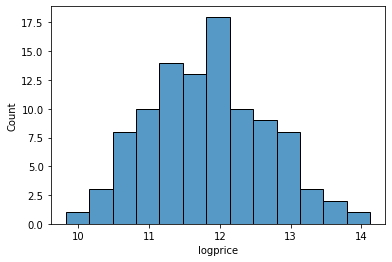

In [134]:
sns.histplot(df, x="logprice", bins = 13)

In [144]:
df.neighborhood.value_counts()

Ourense Capital                                       2
Castelló de la Plana                                  2
Palencia Capital                                      2
Mataró                                                2
Burgos Capital                                        2
San Sebastián de los Reyes                            1
Montcada i Reixac                                     1
Pineda de Mar                                         1
Distrito Centro. Marbella                             1
Yaiza                                                 1
Cuenca Capital                                        1
El Puerto de Santa María                              1
Gandia                                                1
Mérida                                                1
O Rosal                                               1
Igualada                                              1
Llucmajor                                             1
Mont-roig del Camp                              

In [ ]:
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
 
df = pd.read_csv("hackupc_total_treated.csv")

# drop columnes que no ens interessen: "summary", "property_type", "images", "region", "summary", "X", "property_id", "beach_view", "price"
# drop columnes que no ens interessen: 
columns_to_drop = ['Unnamed: 0', "property_id", "summary", "region", "price", "images", "beach_view"] 
df = df.drop(columns_to_drop, axis=1).reset_index(drop= True)

label_encoder = LabelEncoder()
df['property_type_numeric'] = label_encoder.fit_transform(df['property_type'])

DF = df.drop(columns=['property_type']).reset_index(drop= True)

X = df[:, df.columns != "logprice"]
y = = df["logrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1]:
most_important = ["image_data.r1r6.property", "pool", "vanity", "fireplace", "double_sink", "tv","hardwood_floor", "mirror", "dishwasher", "floor_ceiling_windows", "microwave", "notable_chandelier", "pergola", "shower", "kitchen_island", "outdoor_bar", "oven", "radiator", "built_in_shelves","refrigerator"]
len(most_important)# pool si hi ha garden o alguna cosa

20

In [ ]:
ridge_cross_val_metrics = pd.DataFrame(columns=['mean MSE', 'mean norm_MSE', 'mean R2'])
lambdas = [0, 0.01, 0.1, 0.5]

# We calculate the cross-validation metrics for each lambda 
for lambda_val in lambdas:
    kf = KFold(n_splits=5)
    i=1
    cv_mse = []
    cv_nmse = []
    cv_r2 = []
    # We compute the metrics for each fold and then perform the mean.
    for train_index, test_index in kf.split(X_train):
        x_train_fold = X_train.values[train_index]
        y_train_fold = y_train.values[train_index]
        x_test_fold = X_train.values[test_index,:]
        y_test_fold = y_train.values[test_index]

        lr = Ridge(alpha=lambda_val)
        lr.fit(x_train_fold,y_train_fold)
        y_pred_fold = lr.predict(x_test_fold)
        fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
        fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
        fold_r2 = r2_score(y_test_fold, y_pred_fold)
        cv_mse.append(fold_mse)
        cv_nmse.append(fold_nmse)
        cv_r2.append(fold_r2)
    
    ridge_cross_val_metrics.loc['Lambda={}'.format(lambda_val),:] = [np.mean(cv_mse),np.mean(cv_nmse),np.mean(cv_r2)]
    
ridge_cross_val_metrics.sort_values(by='mean R2',ascending=False)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_top_five_house(new_house, df):
    """Returns top 5 most similar houses in dataframe"""
    # primer fem amb les propietats importants
    df_houses = df[df.price < new_house.price *1.17] # SHA DE PENSAR
    
    similarity_scores_200 = cosine_similarity(new_house, df_houses[[...]]) # afegir noms columnes
    most_similar_indexes_200 = similarity_scores_200.argsort()[0,::-1][:200]
    top_similar_houses_200 = data.loc[most_similar_indexes]
    
    similarity_scores_5 = cosine_similarity(new_house, top_similar_houses_200)
    most_similar_indexes_5 = similarity_scores_5.argsort()[0,::-1][:5]
    top_similar_houses_5 = data.loc[most_similar_indexes_5]

    return top_similar_houses_5

In [ ]:
def house_to_dataframe(house_json):
    # one house
    df_house = pd.DataFrame.from_dict(house_json, orient="index")
         
    # r1r6
    df_house["image_data.r1f6.property"] = df_house["image_data"]["r1r6"]["property"]
    
    features_detected = ['baseboard_radiator', 'central_ac', 'dishwasher', 'double_oven', 'microwave', 'oven', 'radiator', 'range_hood', 'range_oven', 'separate_washer__dryer', 'stacked_washer__dryer', 'stovetop', 'refrigerator', 'tv', 'wall_mounted_ac', 'washer__dryer', 'water_heater', 'backsplash', 'bath', 'combined_bath_shower', 'double_sink', 'mirror', 'shower', 'sink', 'toilet', 'vanity', 'awning', 'balcony', 'basketball_court', 'bocce_ball', 'ceiling_fan', 'deck', 'dock', 'dog_park', 'dog_washing_station', 'fence', 'fire_pit', 'fireplace', 'fountain', 'french_doors', 'garden', 'gate', 'gazebo', 'hot_tub', 'lanai', 'lawn', 'mail_area', 'outdoor_bar', 'outdoor_kitchen', 'outdoor_living_space', 'outdoor_structure', 'package_area', 'patio', 'pergola', 'playground', 'pool', 'porch', 'putting_green', 'shuffleboard', 'soccer_field', 'solar_panels', 'storm_shelter', 'sunroom', 'tennis_court', 'trampoline', 'volleyball_court', 'aggregate_floor', 'brick_floor', 'carpet', 'concrete_floor', 'hardwood_floor', 'parquet_floor', 'tile_floor', 'beamed_ceiling', 'brick_ceiling', 'brick_wall', 'built_in_shelves', 'ceiling_fan', 'coffered_ceiling', 'concrete_ceiling', 'concrete_wall', 'crown_molding', 'drop_ceiling', 'elevator', 'fireplace', 'floor_ceiling_windows', 'french_doors', 'high_ceiling', 'log_wall', 'low_ceiling', 'natural_light', 'notable_chandelier', 'pool', 'skylight', 'stone_wall', 'textured_ceiling', 'tile_wall', 'track_lighting', 'tray_ceiling', 'vaulted_ceiling', 'wood_ceiling', 'wood_wall', 'backsplash', 'brown_cabinets', 'dark_brown_cabinets', 'light_brown_cabinets', 'white_cabinets', 'stone_countertops', 'countertops', 'kitchen_bar', 'kitchen_island', 'pendant_lighting','attached_carport', 'attached_garage', 'built_in_garage', 'detached_carport', 'detached_garage','beach_view', 'mountain_view', 'water_view']

    for col in features_detected:
        df_house[col] = 0

    j = df_house['image_data']["features_by_room_type"]
    for k in j:
        for i in range (len(j[k]["unique_features"])):
            feature = j[k]["unique_features"][i]['label'];
            df_house[feature] = 1
    
    df_house.drop("image_data", axis=1)
    return df_house
